In [1]:
from datasets import SineDataset
import numpy as np
import GPy
from torch import distributions as D
import torch

In [2]:
dataset = SineDataset(1000, (0, 10))
test_dataset = SineDataset(500, (0, 10))

In [3]:
X = []
X_test = []
y = []
y_test = []

In [4]:
for pair in dataset:
    X.append(pair[0].numpy())
    y.append(pair[1].numpy())

for pair in test_dataset:
    X_test.append(pair[0].numpy())
    y_test.append(pair[1].numpy())

In [5]:
X = np.array(X)
y = np.array(y)

X_test = np.array(X_test)
y_test = np.array(y_test)

dim = X.shape[1]

In [6]:
kern = GPy.kern.RBF(dim, ARD = True) 

In [7]:
print("y shape: ", y.shape)

y shape:  (1000, 1)


In [8]:
model = GPy.models.GPRegression(X, y, kern, normalizer=True)
#model.kern.lengthscale = 10.

In [9]:
model.optimize()
#model.kern.lengthscale = 1.0
#model.kern.variance = 10.0
#model.Gaussian_noise.variance = 1.0

In [10]:
print(model)


Name : GP regression
Objective : 617.8484817627873
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   4.8798886993711355  |      +ve      |        
  rbf.lengthscale          |   2.2011052510047433  |      +ve      |        
  Gaussian_noise.variance  |  0.19167205612519558  |      +ve      |        


{'dataplot': [<matplotlib.collections.PathCollection at 0x1a2ad99240>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1a2ad99160>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1a2ad997f0>]}

 /anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


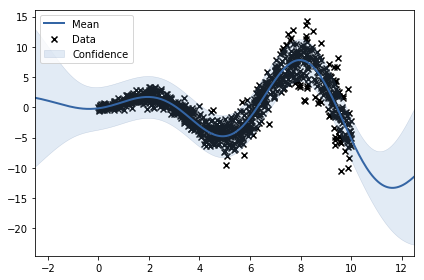

In [11]:
model.plot()
#fig = model.plot()
#GPy.plotting.show(fig, filename='Essaie')
#model['gpconfidence']

In [15]:
mu_test, cov_test = model.predict(X_test, full_cov=True)

In [16]:
print(mu_test)

[[-4.40619644e+00]
 [ 6.65622252e+00]
 [-3.07177027e+00]
 [ 7.34789143e+00]
 [ 6.57416277e-01]
 [-3.04953062e+00]
 [ 3.16184066e+00]
 [-4.15435112e+00]
 [ 1.48974940e+00]
 [-2.45710879e+00]
 [ 1.38271311e+00]
 [-8.44924871e-01]
 [ 1.32718014e+00]
 [-4.56448158e+00]
 [-4.76099673e+00]
 [ 7.81742943e+00]
 [-4.36240328e+00]
 [ 1.64126177e+00]
 [ 2.31776886e-01]
 [ 5.63478538e+00]
 [-3.01880829e-01]
 [ 6.22699602e+00]
 [-1.35813761e+00]
 [-3.15529882e+00]
 [ 4.47059447e-01]
 [-6.69600375e-02]
 [ 1.77106890e+00]
 [-4.11319062e+00]
 [ 4.47245480e+00]
 [ 1.92586979e+00]
 [ 1.28335599e+00]
 [ 1.70998445e+00]
 [-1.27744726e-01]
 [ 1.52815069e+00]
 [ 2.43751226e-01]
 [-2.56493051e+00]
 [-3.31115678e+00]
 [-3.77917661e+00]
 [-3.61154909e+00]
 [ 7.82026534e+00]
 [ 2.21847589e-01]
 [-6.45809620e-01]
 [ 6.27791080e-01]
 [ 6.87511820e+00]
 [ 7.85840017e-02]
 [ 1.22577733e+00]
 [ 1.23838731e+00]
 [ 5.52307393e+00]
 [ 6.75643704e+00]
 [ 1.64061250e+00]
 [ 7.57552771e+00]
 [ 7.76043215e+00]
 [-4.3939505

In [17]:
var = np.diag(cov_test)

In [18]:
var

array([3.02023752, 3.022004  , 3.02037391, 3.02138018, 3.02657246,
       3.01927584, 3.0270069 , 3.01927534, 3.02213749, 3.01933415,
       3.02286678, 3.01957621, 3.02006788, 3.01939517, 3.01964312,
       3.02126431, 3.02026545, 3.02127327, 3.02700959, 3.02168826,
       3.01905616, 3.0230096 , 3.01948827, 3.0192681 , 3.02624069,
       3.06850275, 3.02074632, 3.01927008, 3.02120027, 3.02024354,
       3.02358812, 3.02097297, 3.01971589, 3.02023255, 3.01979649,
       3.01932194, 3.01925861, 3.0204498 , 3.02045595, 3.02127177,
       3.02962818, 3.01961298, 3.02656005, 3.02197739, 3.0339213 ,
       3.02004002, 3.01978404, 3.02417713, 3.02201946, 3.02042665,
       3.0212044 , 3.0211918 , 3.02024561, 3.02010512, 3.02500256,
       3.02349692, 3.01947842, 3.02018659, 3.02687441, 3.01942537,
       3.0198628 , 3.02189498, 3.0192824 , 3.02199709, 3.02055942,
       3.04676061, 3.0216707 , 3.03086642, 3.03847126, 3.02042629,
       3.02876609, 3.0850172 , 3.02850636, 3.02117731, 3.02197

## Just to check tensors

In [31]:
import torch

num_samples = 500
def f(x):
    return x * np.sin(x) # x**3

X = np.random.uniform(0, 10, size=num_samples)
x = np.linspace(-4, 14, 250)
y = f(X) + 0.3*np.random.randn(num_samples) + 0.3*X*np.random.randn(num_samples) # added input dependent noise
X = torch.tensor(np.atleast_2d(X).T).to(torch.float32)
y = torch.tensor(y).to(torch.float32)
x = torch.tensor(np.atleast_2d(x).T).to(torch.float32)

In [52]:
X
#torch.tensor(np.atleast_2d(X).T).to(torch.float32)

tensor([[1.1477e+00],
        [2.9171e+00],
        [6.2568e+00],
        [9.6146e+00],
        [1.0094e+00],
        [8.5273e+00],
        [6.7120e+00],
        [7.7076e+00],
        [5.0391e-01],
        [4.1868e+00],
        [7.7671e+00],
        [9.3042e+00],
        [4.5084e+00],
        [8.0496e-03],
        [4.7384e-01],
        [9.2005e+00],
        [7.2651e+00],
        [6.7726e+00],
        [3.6141e+00],
        [3.1318e-01],
        [7.9291e+00],
        [7.9911e+00],
        [8.9607e+00],
        [8.4911e+00],
        [1.6439e-01],
        [1.3618e+00],
        [8.7315e+00],
        [9.9227e+00],
        [1.1849e+00],
        [6.4806e+00],
        [2.6104e-01],
        [1.3023e-01],
        [3.9284e+00],
        [9.4468e+00],
        [3.9634e+00],
        [3.2292e+00],
        [2.4061e+00],
        [8.4760e+00],
        [1.0082e+00],
        [5.6253e+00],
        [7.1259e+00],
        [4.8121e+00],
        [7.3506e+00],
        [6.7188e+00],
        [9.9575e+00],
        [9

In [33]:
def dist(X, Y): # X:  N x d , Y: M x d
    dist =  X.norm(p=2, dim=1, keepdim=True)**2 + \
            Y.norm(p=2, dim=1, keepdim=False)**2 - \
            2*torch.matmul(X, Y.t())
    return dist.clamp(0.0) # N x M

In [50]:
X.norm(p=2, dim=1, keepdim=True)

tensor([[1.1477e+00],
        [2.9171e+00],
        [6.2568e+00],
        [9.6146e+00],
        [1.0094e+00],
        [8.5273e+00],
        [6.7120e+00],
        [7.7076e+00],
        [5.0391e-01],
        [4.1868e+00],
        [7.7671e+00],
        [9.3042e+00],
        [4.5084e+00],
        [8.0496e-03],
        [4.7384e-01],
        [9.2005e+00],
        [7.2651e+00],
        [6.7726e+00],
        [3.6141e+00],
        [3.1318e-01],
        [7.9291e+00],
        [7.9911e+00],
        [8.9607e+00],
        [8.4911e+00],
        [1.6439e-01],
        [1.3618e+00],
        [8.7315e+00],
        [9.9227e+00],
        [1.1849e+00],
        [6.4806e+00],
        [2.6104e-01],
        [1.3023e-01],
        [3.9284e+00],
        [9.4468e+00],
        [3.9634e+00],
        [3.2292e+00],
        [2.4061e+00],
        [8.4760e+00],
        [1.0082e+00],
        [5.6253e+00],
        [7.1259e+00],
        [4.8121e+00],
        [7.3506e+00],
        [6.7188e+00],
        [9.9575e+00],
        [9

In [36]:
9.2440e+01

92.44

In [38]:
y.norm(p=2, dim=1, keepdim=True)**2

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [54]:
np.concatenate([X], axis=0)

array([[1.1477156e+00],
       [2.9170718e+00],
       [6.2568359e+00],
       [9.6145697e+00],
       [1.0094209e+00],
       [8.5272818e+00],
       [6.7120457e+00],
       [7.7075768e+00],
       [5.0390816e-01],
       [4.1868339e+00],
       [7.7670650e+00],
       [9.3041773e+00],
       [4.5084462e+00],
       [8.0496408e-03],
       [4.7383913e-01],
       [9.2004509e+00],
       [7.2650981e+00],
       [6.7726283e+00],
       [3.6141102e+00],
       [3.1318444e-01],
       [7.9291024e+00],
       [7.9911380e+00],
       [8.9606962e+00],
       [8.4911242e+00],
       [1.6438586e-01],
       [1.3617705e+00],
       [8.7315350e+00],
       [9.9226866e+00],
       [1.1848731e+00],
       [6.4805646e+00],
       [2.6103666e-01],
       [1.3023075e-01],
       [3.9284396e+00],
       [9.4468374e+00],
       [3.9634342e+00],
       [3.2292094e+00],
       [2.4061201e+00],
       [8.4760447e+00],
       [1.0082191e+00],
       [5.6252580e+00],
       [7.1258645e+00],
       [4.812053

In [57]:
(-X).clamp(0.0)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [13]:
tens_alpha = torch.tensor([2,0.5])
tens_beta = torch.tensor([1,1])
gamma_dist = D.Gamma(tens_alpha,tens_beta)

In [14]:
gamma_dist.rsample(torch.Size([10]))

tensor([[2.5986e+00, 5.4511e-02],
        [1.4851e+00, 2.4806e-04],
        [1.8625e+00, 6.2965e-01],
        [2.0858e+00, 3.2664e-01],
        [1.6027e+00, 2.2403e-02],
        [6.2232e+00, 7.7735e-01],
        [1.4183e+00, 2.1369e-02],
        [3.6213e+00, 5.1680e-02],
        [3.7280e+00, 2.0494e+00],
        [1.6816e+00, 3.7209e-01]])

In [9]:
torch.tensor([[2,0.5],[1,1]])

tensor([[2.0000, 0.5000],
        [1.0000, 1.0000]])

In [15]:
torch.__version__

'1.3.1'

In [17]:
import tensorflow as tf
tf.__version__

'1.13.1'